# Imports

In [1]:
import numpy as np
import pandas as pd

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('../data/ift6758_dfwseasons 4/Allseasons.csv')

In [3]:
df = pd.read_csv('Allseasons.csv')

In [6]:
teams = df.groupby(['season', 'gameType'])['teamOfShooter'].unique()
game_types = df['gameType'].unique()
teams


season  gameType
2016    P           [Montréal Canadiens, New York Rangers, Ottawa ...
        R           [Toronto Maple Leafs, Ottawa Senators, St. Lou...
2017    P           [Tampa Bay Lightning, New Jersey Devils, Bosto...
        R           [Winnipeg Jets, Toronto Maple Leafs, Pittsburg...
2018    P           [Columbus Blue Jackets, Tampa Bay Lightning, B...
        R           [Montréal Canadiens, Toronto Maple Leafs, Wash...
2019    P           [Philadelphia Flyers, Montréal Canadiens, Tamp...
        R           [Ottawa Senators, Toronto Maple Leafs, St. Lou...
2020    P           [Pittsburgh Penguins, New York Islanders, Wash...
        R           [Philadelphia Flyers, Pittsburgh Penguins, Chi...
Name: teamOfShooter, dtype: object

# Process Data

In [10]:
def normalize_df(df):
    df_normalized = df.copy()
    df_normalized['xCoordNorm'] = np.where(df['rinkSide'] == 'left', df['xCoord'], -1 * df['xCoord'])
    df_normalized['yCoordNorm'] = np.where(df['rinkSide'] == 'left', df['yCoord'], -1 * df['yCoord'])
    return df_normalized

def compute_distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)


# Normalize Shot Direction
is_normalized = True
df_normalized = normalize_df(df)


# Distance from Net
net_x, net_y = (89, 0)
df_normalized['distance'] = df_normalized[['xCoordNorm', 'yCoordNorm']].apply(
    lambda row: compute_distance(row['xCoordNorm'], row['yCoordNorm'], net_x, net_y),
    axis=1
)

print(df_normalized)

       eventType  period periodTime periodType      gameID  \
0           Shot       1      01:11    REGULAR  2016020001   
1           Shot       1      02:53    REGULAR  2016020001   
2           Shot       1      04:01    REGULAR  2016020001   
3           Shot       1      04:46    REGULAR  2016020001   
4           Shot       1      06:46    REGULAR  2016020001   
...          ...     ...        ...        ...         ...   
385071      Shot       3      16:19    REGULAR  2020030415   
385072      Shot       3      17:13    REGULAR  2020030415   
385073      Shot       3      19:01    REGULAR  2020030415   
385074      Shot       3      19:10    REGULAR  2020030415   
385075      Shot       3      19:24    REGULAR  2020030415   

              teamOfShooter homeOrAway  xCoord  yCoord            shooter  \
0       Toronto Maple Leafs       away   -77.0     5.0    Mitchell Marner   
1           Ottawa Senators       home    86.0    13.0        Chris Kelly   
2           Ottawa Senat

# Create Plot

In [11]:
df_normalized['shotType'] = df_normalized['shotType'].fillna('Unknown')
shot_types = sorted(df_normalized['shotType'].unique())

def plot_events_hostogram(
    events, normalize=False, title='', marker='o', size=100, color='#ea6969', alpha=.7
):
    fig, ax = plt.subplots(figsize=(13,8.5))
    plt.axis('on')

    sns.histplot(
        data=events, x="shotType", hue="eventType", multiple="stack", shrink=.8, stat='density',
        bins=shot_types, hue_order=['Shot', 'Goal']
    )


@interact(
    season_year=widgets.IntSlider(min=2016, max=2020, step=1),
    game_type=game_types
)
def show_data(season_year, game_type):
    season_data = df_normalized[(df_normalized['season'] == season_year) & (df_normalized['gameType'] == game_type)]
    plot_events_hostogram(season_data)



In [7]:
df_normalized['distance']

0         13.000000
1         13.341664
2         76.157731
3         57.974132
4         61.717096
            ...    
385071    43.863424
385072    45.276926
385073    46.173586
385074    12.369317
385075    21.633308
Name: distance, Length: 385076, dtype: float64

def plot_events_hostogram(
    events, normalize=False, title='', marker='o', size=100, color='#ea6969', alpha=.7
):
    fig, ax = plt.subplots(figsize=(13,8.5))
    plt.axis('on')

    ax = sns.violinplot(x="season", y="distance", hue="eventType",
                    data=events, palette="muted", split=True)
#     sns.histplot(
#         data=events, x="shotType", hue="eventType", multiple="stack", shrink=.8, stat='density',
#         bins=shot_types, hue_order=['Shot', 'Goal']
#     )


@interact(
    season_year=widgets.IntSlider(min=2016, max=2020, step=1),
    game_type=game_types,
)
def show_data(season_year, game_type):
    season_data = df_normalized[(df_normalized['season'] == season_year) & (df_normalized['gameType'] == game_type)]
    plot_events_hostogram(season_data)



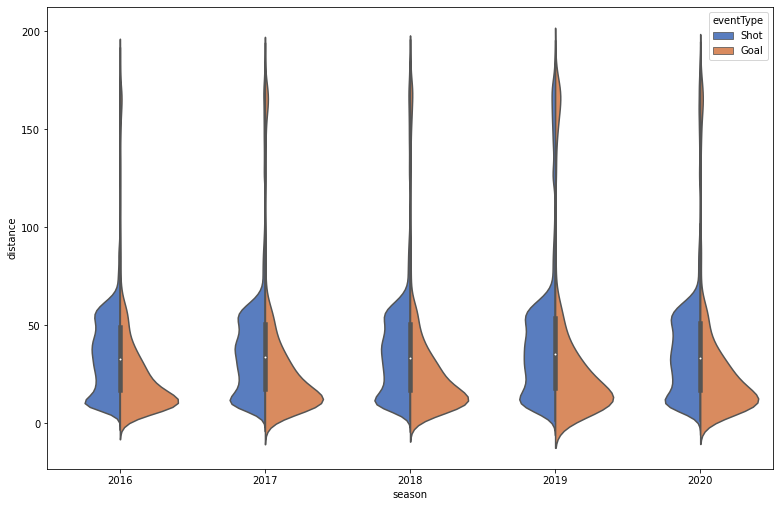

In [12]:
fig, ax = plt.subplots(figsize=(13,8.5))
plt.axis('on')

ax = sns.violinplot(x="season", y="distance", hue="eventType",
                data=df_normalized, palette="muted", split=True)

Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?

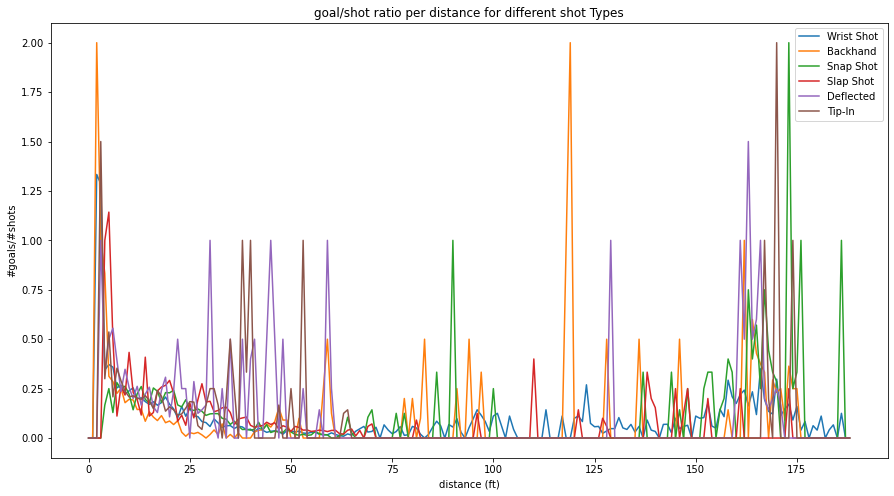

In [143]:

df_norm_2017=df_normalized[df_normalized["season"]==2017]
d= df_norm_2017
d_shots = d[d["eventType"]=="Shot"]
d_goals = d[d["eventType"]=="Goal"]

##################################################
#function that gives array of #goals/#shots per distance (each element in the list is a foot of length)
##################################################
def shots_goals(d_shots,d_goals,shotType):

    d_shots= d_shots[d_shots["shotType"]==shotType]
    distance_shots= np.array(d_shots['distance']) 
    d_goals= d_goals[d_goals["shotType"]==shotType]
    distance_goals= np.array(d_goals['distance']) 

    b = 190
    xshots=plt.hist(distance_shots,bins=range(b))
    plt.close()

    xgoals =plt.hist(distance_goals,bins=range(b))
    plt.close()

    shots_goals=[]

    for i,j in zip(xgoals[0], xshots[0]):
        if i==0 or j==0:
            shots_goals.append(0)
        else:
            shots_goals.append(i/j)

    return shots_goals
##################################################
                #Backhand
##################################################

wrist = shots_goals(d_shots,d_goals,"Wrist Shot")

back = shots_goals(d_shots,d_goals,"Backhand")
snap = shots_goals(d_shots,d_goals,"Snap Shot")
slap = shots_goals(d_shots,d_goals,"Slap Shot")
deflected = shots_goals(d_shots,d_goals,"Deflected")
tip = shots_goals(d_shots,d_goals,"Tip-In")

plt.figure(figsize=(15, 8))

x = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
x2= range(len(wrist))
plt.plot(x2,wrist,label="Wrist Shot", )
plt.plot(x2,back,label = "Backhand")
plt.plot(x2,snap,label = "Snap Shot")
plt.plot(x2,slap,label = "Slap Shot")
plt.plot(x2,deflected,label = "Deflected")
plt.plot(x2,tip,label = "Tip-In")

plt.xlabel("distance (ft)")
plt.ylabel("#goals/#shots")
plt.title("goal/shot ratio per distance for different shot Types")
plt.legend(loc='best')

#print(df_norm_2017['distance'].max()

#np.histogram(distances, bins=100)

In [83]:
print(df_norm_2017['shotType'].unique())



['Wrist Shot' 'Backhand' 'Snap Shot' 'Slap Shot' 'Deflected' 'Tip-In'
 'Wrap-around' 'Unknown']
<class 'numpy.ndarray'>


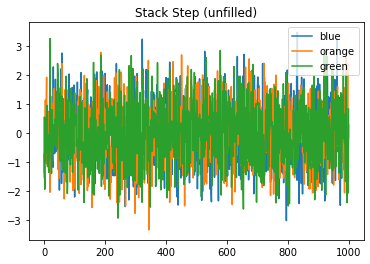

In [81]:
n_bins=30
x = np.random.randn(1000, 3)
colors = ['blue', 'orange', 'green']
plt.plot(range(len(x)),x, label=colors)
plt.legend(loc="upper right")
plt.title('Stack Step (unfilled)')
plt.show()

perrita


0